给定一个真解为 $$u=cos\pi x cos \pi y,$$的Poisson方程,其定义域为$[0,1]^2$,只有纯的Dirichlet边界条件,下面演示基于Fealpy求解这个算例的过程.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # 画图

### Step1:导入创建pde模型

In [2]:
from fealpy.pde.poisson_2d import CosCosData # 导入二维 Poisson 模型实例
pde=CosCosData() # 创建 pde 模型对象

### Step2:生成网格

In [3]:
from fealpy.mesh import MeshFactory as MF
domain=[0,1,0,1]
mesh=MF.boxmesh2d(domain,nx=3,ny=3,meshtype='tri')

run boxmesh2d with time: 0.0006567000000003986


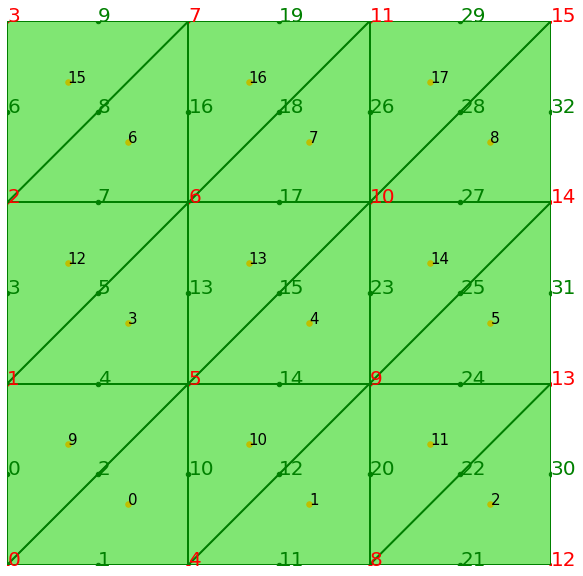

In [4]:
fig=plt.figure(figsize=(10,10))
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,showindex=True,fontsize=20)
mesh.find_edge(axes,showindex=True,fontsize=20)
mesh.find_cell(axes,showindex=True)
plt.show()

In [5]:
cell2cell=mesh.ds.cell_to_cell() 
cell2edge=mesh.ds.cell_to_edge()
cell2node=mesh.ds.cell_to_node()
edge2cell=mesh.ds.edge_to_cell()
edge2edge=mesh.ds.edge_to_edge()
edge2node=mesh.ds.edge_to_node()
node2cell=mesh.ds.node_to_cell()
node2edge=mesh.ds.node_to_edge()
node2node=mesh.ds.node_to_node()

object_name=['cell2cell','cell2edge','cell2node','edge2cell','edge2edge','edge2node','node2cell','node2edge','node2node']
object_=[cell2cell,cell2edge,cell2node,edge2cell,edge2edge,edge2node,node2cell,node2edge,node2node]

for index in range(len(object_name)):
    print(object_name[index])
    for i,var in enumerate(object_[index]):
        print(i,':',var)

cell2cell
0 : [ 9  0 10]
1 : [10  1 11]
2 : [11  2  2]
3 : [12  9 13]
4 : [13 10 14]
5 : [14 11  5]
6 : [15 12 16]
7 : [16 13 17]
8 : [17 14  8]
9 : [0 3 9]
10 : [1 4 0]
11 : [2 5 1]
12 : [ 3  6 12]
13 : [4 7 3]
14 : [5 8 4]
15 : [ 6 15 15]
16 : [ 7 16  6]
17 : [ 8 17  7]
cell2edge
0 : [ 2  1 10]
1 : [12 11 20]
2 : [22 21 30]
3 : [ 5  4 13]
4 : [15 14 23]
5 : [25 24 31]
6 : [ 8  7 16]
7 : [18 17 26]
8 : [28 27 32]
9 : [2 4 0]
10 : [12 14 10]
11 : [22 24 20]
12 : [5 7 3]
13 : [15 17 13]
14 : [25 27 23]
15 : [8 9 6]
16 : [18 19 16]
17 : [28 29 26]
cell2node
0 : [4 5 0]
1 : [8 9 4]
2 : [12 13  8]
3 : [5 6 1]
4 : [ 9 10  5]
5 : [13 14  9]
6 : [6 7 2]
7 : [10 11  6]
8 : [14 15 10]
9 : [1 0 5]
10 : [5 4 9]
11 : [ 9  8 13]
12 : [2 1 6]
13 : [ 6  5 10]
14 : [10  9 14]
15 : [3 2 7]
16 : [ 7  6 11]
17 : [11 10 15]
edge2cell
0 : [9 9 2 2]
1 : [0 0 1 1]
2 : [0 9 0 0]
3 : [12 12  2  2]
4 : [3 9 1 1]
5 : [ 3 12  0  0]
6 : [15 15  2  2]
7 : [ 6 12  1  1]
8 : [ 6 15  0  0]
9 : [15 15  1  1]
10 : [ 0 1

### Step3: 建立Lagrange有限元空间,代码中p=1也可以设为更大的整数,表示建立p次的空间

In [6]:
from fealpy.functionspace import LagrangeFiniteElementSpace
space=LagrangeFiniteElementSpace(mesh,p=3) 

In [7]:
space

### Step4: 创建Dirichlet边界条件处理对象

In [8]:
# 导入Dirichlet 边界处理
from fealpy.boundarycondition import DirichletBC
bc=DirichletBC(space,pde.dirichlet) # 创建Dirichlet边界条件处理对象

### Step5:创建离散代数系统,并进行边界条件处理.

In [9]:
uh=space.function() # 创建有限元函数对象
A=space.stiff_matrix() # 组装刚度矩阵对象
F=space.source_vector(pde.source) # 组装右端向量对象
A,F=bc.apply(A,F,uh) # 应用 Dirichlet 边界条件

run serial_construct_matrix with time: 0.0065192000000013905


In [19]:
ldof=space.number_of_local_dofs()
gdof=space.number_of_global_dofs()
print('ldof:',ldof,'gdof:',gdof)

ldof: 10 gdof: 100


In [18]:
print('A.shape:',A.shape,'F.shape:',F.shape)

A.shape: (100, 100) F.shape: (100,)


In [10]:
print(A)
np.array(A)
# import pandas as pd

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	3.399999999999981
  (5, 6)	-0.17499999999999913
  (5, 9)	-0.1749999999999991
  (5, 20)	0.0749999999999952
  (5, 21)	0.07499999999999969
  (5, 24)	0.7124999999999981
  (5, 25)	-1.312499999999997
  (5, 26)	-0.07500000000000026
  (5, 27)	-0.07500000000000026
  (5, 36)	0.7124999999999981
  (5, 37)	-1.312499999999997
  (5, 40)	-0.07500000000000026
  (5, 41)	-0.07500000000000026
  (5, 42)	-1.312499999999997
  (5, 43)	0.7124999999999981
  (5, 44)	-1.312499999999997
  (5, 45)	0.7124999999999981
  (5, 46)	0.07499999999999969
  (5, 47)	0.0749999999999952
  (5, 50)	-0.03750000000000042
  :	:
  (95, 95)	8.100000000000007
  (96, 9)	2.8372366184865113e-15
  (96, 10)	5.575786745895231e-15
  (96, 62)	-2.7632217501781674e-15
  (96, 63)	-2.0250000000000035
  (96, 66)	-2.025000000000001
  (96, 67)	-2.0250000000000017
  (96, 70)	-2.0250000000000044
  (96, 71)	-2.724672339600905e-15
  (96, 96)	8.100000000000005
  (97, 32)	-2.02500000

array(<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 782 stored elements in Compressed Sparse Row format>, dtype=object)

### Step6: 求解离散系统

In [20]:
# 导入稀疏线性代数系统求解函数
from scipy.sparse.linalg import spsolve
uh[:]=spsolve(A,F)

In [31]:
print('uh.shape:',uh.shape)
print('uh:',uh)
display(uh)

uh.shape: (100,)
uh: [ 1.          0.5        -0.5        -1.          0.5         0.25064219
 -0.24827895 -0.5        -0.5        -0.24827895  0.25064219  0.5
 -1.         -0.5         0.5         1.          0.76604444  0.93969262
  0.93969262  0.76604444  0.58654571  0.88202907 -0.17364818  0.17364818
  0.46957737  0.3834483  -0.13220645  0.16361398 -0.93969262 -0.76604444
 -0.47084519 -0.38342001 -0.71855242 -0.71855242 -0.76604444 -0.93969262
  0.46957737  0.3834483   0.17364818 -0.17364818 -0.13220645  0.16361398
  0.08595183 -0.08719136  0.08595183 -0.08719136  0.03129028  0.03129028
 -0.38342001 -0.47084519 -0.08719136  0.08595183  0.16361398 -0.13220645
  0.17364818 -0.17364818 -0.47084519 -0.38342001 -0.76604444 -0.93969262
 -0.71855242 -0.71855242 -0.08719136  0.08595183 -0.38342001 -0.47084519
  0.16361398 -0.13220645  0.3834483   0.46957737  0.3834483   0.46957737
  0.88202907  0.58654571  0.93969262  0.76604444 -0.93969262 -0.76604444
 -0.17364818  0.17364818  0.76604444 

Function([ 1.        ,  0.5       , -0.5       , -1.        ,  0.5       ,
           0.25064219, -0.24827895, -0.5       , -0.5       , -0.24827895,
           0.25064219,  0.5       , -1.        , -0.5       ,  0.5       ,
           1.        ,  0.76604444,  0.93969262,  0.93969262,  0.76604444,
           0.58654571,  0.88202907, -0.17364818,  0.17364818,  0.46957737,
           0.3834483 , -0.13220645,  0.16361398, -0.93969262, -0.76604444,
          -0.47084519, -0.38342001, -0.71855242, -0.71855242, -0.76604444,
          -0.93969262,  0.46957737,  0.3834483 ,  0.17364818, -0.17364818,
          -0.13220645,  0.16361398,  0.08595183, -0.08719136,  0.08595183,
          -0.08719136,  0.03129028,  0.03129028, -0.38342001, -0.47084519,
          -0.08719136,  0.08595183,  0.16361398, -0.13220645,  0.17364818,
          -0.17364818, -0.47084519, -0.38342001, -0.76604444, -0.93969262,
          -0.71855242, -0.71855242, -0.08719136,  0.08595183, -0.38342001,
          -0.47084519,  0

### Step7: 计算L2和H1误差.

In [39]:
L2Error= space.integralalg.error(pde.solution,uh)
H1Error= space.integralalg.error(pde.gradient,uh.grad_value)
display(L2Error,H2Error)

0.0010992266911304881

0.031321437949264536

In [33]:
display(pde.solution,pde.gradient)

<bound method CosCosData.solution of <fealpy.pde.poisson_2d.CosCosData object at 0x000001D54D964130>>

<bound method CosCosData.gradient of <fealpy.pde.poisson_2d.CosCosData object at 0x000001D54D964130>>

In [38]:
pde.solution

<bound method CosCosData.solution of <fealpy.pde.poisson_2d.CosCosData object at 0x000001D54D964130>>

### Step8:画出解函数和网格图像

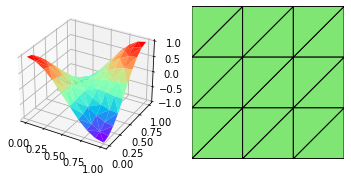

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
axes=fig.add_subplot(1,2,1,projection='3d')
uh.add_plot(axes,cmap='rainbow')
axes=fig.add_subplot(1,2,2)
mesh.add_plot(axes)

<Axes3DSubplot:>

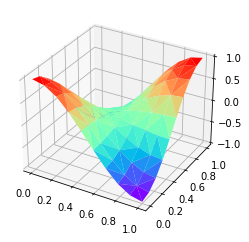

In [29]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1,projection='3d')
uh.add_plot(axes,cmap='rainbow')

### true solution

In [41]:
from fealpy.decorator import cartesian, barycentric
class CosCosData:
    """
        -\\Delta u = f
        u = cos(pi*x)*cos(pi*y)
    """
    def __init__(self):
        pass

    def domain(self):
        return np.array([0, 1, 0, 1])

    @cartesian
    def solution(self, p):
        """ The exact solution 
        Parameters
        ---------
        p : 


        Examples
        -------
        p = np.array([0, 1], dtype=np.float64)
        p = np.array([[0, 1], [0.5, 0.5]], dtype=np.float64)
        """
        x = p[..., 0]
        y = p[..., 1]
        pi = np.pi
        val = np.cos(pi*x)*np.cos(pi*y)
        return val # val.shape == x.shape


    @cartesian
    def source(self, p):
        """ The right hand side of Possion equation
        INPUT:
            p: array object,  
        """
        x = p[..., 0]
        y = p[..., 1]
        pi = np.pi
        val = 2*pi*pi*np.cos(pi*x)*np.cos(pi*y)
        return val

    @cartesian
    def gradient(self, p):
        """ The gradient of the exact solution 
        """
        x = p[..., 0]
        y = p[..., 1]
        pi = np.pi
        val = np.zeros(p.shape, dtype=np.float64)
        val[..., 0] = -pi*np.sin(pi*x)*np.cos(pi*y)
        val[..., 1] = -pi*np.cos(pi*x)*np.sin(pi*y)
        return val # val.shape == p.shape

    @cartesian
    def flux(self, p):
        return -self.gradient(p)

    @cartesian
    def dirichlet(self, p):
        return self.solution(p)

    @cartesian
    def is_dirichlet_boundary(self, p):
        y = p[..., 1]
        return ( y == 1.0) | ( y == 0.0)      

In [59]:
pde_=CosCosData()

In [45]:
pde_.source(p = np.array([0, 1], dtype=np.float64))

-19.739208802178716

In [46]:
pde_.source(p = np.array([[0, 1], [0.5, 0.5]], dtype=np.float64))

array([-1.97392088e+01,  7.40101788e-32])

In [60]:
pde_.solution(p=p)

array([ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
        3.74939946e-33, -6.12323400e-17])

In [61]:
def solution(p):
    """ The exact solution 
    Parameters
    ---------
    p : 


    Examples
    -------
    p = np.array([0, 1], dtype=np.float64)
    p = np.array([[0, 1], [0.5, 0.5]], dtype=np.float64)
    """
    x = p[..., 0]
    y = p[..., 1]
    pi = np.pi
    val = np.cos(pi*x)*np.cos(pi*y)
    return val # val.shape == x.shape

In [62]:
p = np.array([[0,0],[0,1],[1,1],[1,0],[0.5,0.5],[0.5,1]], dtype=np.float64)
display(p.shape,p[..., 0],p[..., 1])

solution(p=p)

(6, 2)

array([0. , 0. , 1. , 1. , 0.5, 0.5])

array([0. , 1. , 1. , 0. , 0.5, 1. ])

array([ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
        3.74939946e-33, -6.12323400e-17])